In [1]:
!pip install scikit-learn==0.24.2 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 14.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autogluon-core 1.1.1 requires scikit-learn<1.4.1,>=1.3.0, but you have scikit-learn 0.24.2 which is incompatible.
autogluon-features 1.1.1 requires scikit-learn<1.4.1,>=1.3.0, but you have scikit-learn 0.24.2 which is incompatible.
autogluon-multimodal 1.1.1 requires scikit-learn<1.4.1,>=1.3.0, but you have scikit-learn 0.24.2 which is incompatible.
autogluon-tabular 1.1.1 requires scikit-learn<1.4.1,>=1.3.0, but you have scikit-learn 0.24.2 which is incompatible.
imbalanced-learn 0.12.3 requires scikit-learn>=1.0.2, but you have scikit-learn 0.24.2 which

In [2]:
!pip install pandas==1.5.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 11.0 MB/s eta 0:00:00 0:00:01
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autogluon-common 1.1.1 requires pandas<2.3.0,>=2.0.0, but you have pandas 1.5.3 which is incompatible.
autogluon-core 1.1.1 requires pandas<2.3.0,>=2.0.0, but you have pandas 1.5.3 which is incompatible.
autogluon-core 1.1.1 requires scikit-learn<1.4.1,>=1.3.0, but you have scikit-learn 0.24.2 which is incompatible.
autogluon-features 1.1.1 requires pandas<2.3.0,>=2.0.0, but you have pandas 1.5.3 which is incompatible.
autogluon-features 1.1.1 requires scikit-learn<1.4.1,>=1.3.0, but you have scikit-learn 0.24.2 which is incompatible.
autogluon-multimodal 1.1.1 requires pandas<2.

In [3]:
import pandas as pd
print(pd.__version__)

1.5.3


In [4]:
import autosklearn

In [5]:
import autosklearn.classification as classifier
from autosklearn.metrics import (accuracy,
                                 f1,
                                 roc_auc,
                                 precision,
                                 average_precision,
                                 recall,
                                 log_loss)

In [6]:
from autosklearn.experimental.askl2 import AutoSklearn2Classifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd


from autosklearn.experimental.askl2 import AutoSklearn2Classifier
import pandas as pd

df_test=pd.read_csv("TestSet_klassification.csv")
df_train=pd.read_csv("TrainSet_klassification.csv")

X_train = df_train.drop(["income"], axis=1)
y_train = df_train["income"]

X_test = df_test.drop(["income"], axis=1)
y_test = df_test["income"]



#trainingstime max 4h

automl = AutoSklearn2Classifier(
    time_left_for_this_task= 14400,
    per_run_time_limit= 600,
    n_jobs = 8,
    memory_limit=8192 
)

In [7]:
automl.fit(X_train, y_train, dataset_name="income")

/usr/local/lib/python3.8/dist-packages/autosklearn/experimental/selector.py:26: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, series in prediction.iteritems():


AutoSklearn2Classifier(memory_limit=8192, metric=accuracy, n_jobs=8,
                       per_run_time_limit=600, time_left_for_this_task=14400)

In [8]:
import sklearn.metrics as skm
from sklearn.metrics import roc_auc_score

#prediction
y_pred = automl.predict(X_test)

# prediction for the AUC-ROC-Score by only using the positive classes
y_pred_proba = automl.predict_proba(X_test)[:, 1]


print("RESULTS OF BEST MODEL:\n")

print(f"F1-Score:                   {skm.f1_score(y_test, y_pred)}")
print(f"AUC-ROC Score:              {roc_auc_score(y_test, y_pred_proba)}")
print(f"Accuracy:                   {skm.accuracy_score(y_test, y_pred)}")
print(f"Precision:                  {skm.precision_score(y_test, y_pred)}")
print(f"Recall:                     {skm.recall_score(y_test, y_pred)}")

RESULTS OF BEST MODEL:

F1-Score:                   0.6137651821862349
AUC-ROC Score:              0.8722127577964168
Accuracy:                   0.824147465437788
Precision:                  0.5379701916252662
Recall:                     0.7144203581526861


In [9]:
from IPython.display import FileLink
#leaderboard to df
leaderboard_df_prepro = automl.leaderboard(detailed=True)
leaderboard_df_prepro = pd.DataFrame(leaderboard_df_prepro)

print(leaderboard_df_prepro)

# download leaderboard
leaderboard_df_prepro.to_csv('autosklearn_classification_leaderboard_preprocessed.csv', index=False)
FileLink('autosklearn_classification_leaderboard_preprocessed.csv')

          rank  ensemble_weight                type      cost  duration  \
model_id                                                                  
5001         1             0.04  passive_aggressive  0.125739  3.735940   
3806         3             0.02  passive_aggressive  0.125826  3.688596   
4777         2             0.02  passive_aggressive  0.125826  3.473560   
4385         4             0.02  passive_aggressive  0.125826  3.591279   
6741         5             0.02  passive_aggressive  0.125869  3.898672   
6422         6             0.08  passive_aggressive  0.125912  4.126465   
4648         7             0.02  passive_aggressive  0.125912  3.602268   
4367         8             0.04  passive_aggressive  0.125955  3.566709   
1709         9             0.02  passive_aggressive  0.125998  4.136239   
4486        10             0.04  passive_aggressive  0.125998  3.452911   
6287        11             0.02  passive_aggressive  0.125998  3.561875   
3050        12           

/opt/nb/autosklearn_classification_leaderboard_preprocessed.csv

In [10]:


automl.leaderboard()# output of values to dictionary
metrics_dict = {
    'Metric': [
        'F1-Score',
        'AUC-ROC Score',
        'Accuracy',
        'Precision',
        'Recall',
    ],
    'Value': [
        skm.f1_score(y_test, y_pred),
        roc_auc_score(y_test, y_pred_proba),
        skm.accuracy_score(y_test, y_pred),
        skm.precision_score(y_test, y_pred),
        skm.recall_score(y_test, y_pred)
    ]
}

#to df
metrics_df_prepro = pd.DataFrame(metrics_dict)


print(metrics_df_prepro)

metrics_df_prepro.to_csv('autosklearn_classification_metrics_preprocessed.csv', index=False)
FileLink('autosklearn_classification_metrics_preprocessed.csv')


          Metric     Value
0       F1-Score  0.613765
1  AUC-ROC Score  0.872213
2       Accuracy  0.824147
3      Precision  0.537970
4         Recall  0.714420


/opt/nb/autosklearn_classification_metrics_preprocessed.csv

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

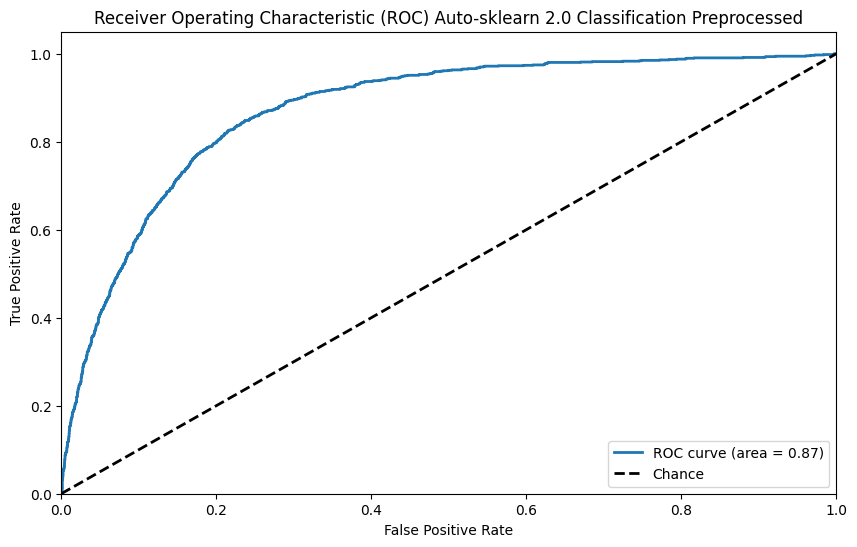

In [12]:
import sklearn.metrics as skm
from sklearn.metrics import roc_curve, auc, roc_auc_score

y_pred = automl.predict(X_test)

# Predicting the probabilities for the positive class
y_pred_proba = automl.predict_proba(X_test)[:, 1]

# Calculating ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve using Matplotlib with Seaborn styling
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})', lw=2)
plt.plot([0, 1], [0, 1], 'k--', label='Chance', lw=2)  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Auto-sklearn 2.0 Classification Preprocessed')
plt.legend(loc="lower right")

# Save the plot as a PNG file
plt.savefig('autosklearn_roc_curve_preprocessed.png', dpi=300)
plt.show()